In [17]:
import pandas as pd

# Load the dataset
logs = pd.read_csv(r"C:\Users\Yawar\Detecting_Data_Breaches\data\examples\simulated_logs.csv")

# Preview the dataset
print(logs.head())
print(logs.info())


                    timestamp  user_id        activity   location   status
0  2024-11-30 00:19:24.728819  user_65     file_upload  Bangalore  success
1  2024-12-01 08:19:24.728819  user_72           login  Bangalore   failed
2  2024-11-22 07:19:24.728819  user_21  password_reset       Pune  success
3  2024-11-16 05:19:24.728819  user_78     file_upload     Mumbai  success
4  2024-12-01 05:19:24.728819  user_45           login     Mumbai  success
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  1000 non-null   object
 1   user_id    1000 non-null   object
 2   activity   1000 non-null   object
 3   location   1000 non-null   object
 4   status     1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB
None


In [18]:
print(f"Number of rows: {logs.shape[0]}")
print(f"Number of columns: {logs.shape[1]}")




Number of rows: 1000
Number of columns: 5


In [19]:
print(logs.describe())


                         timestamp  user_id     activity   location   status
count                         1000     1000         1000       1000     1000
unique                         920      100            3          5        2
top     2024-11-12 17:19:24.730819  user_65  file_upload  Bangalore  success
freq                             3       22          351        211      514


In [20]:
print(logs['activity'].value_counts())
print(logs['location'].value_counts())
print(logs['status'].value_counts())


activity
file_upload       351
password_reset    335
login             314
Name: count, dtype: int64
location
Bangalore    211
Mumbai       204
New Delhi    198
Hyderabad    195
Pune         192
Name: count, dtype: int64
status
success    514
failed     486
Name: count, dtype: int64


In [21]:
print(logs.isnull().sum())


timestamp    0
user_id      0
activity     0
location     0
status       0
dtype: int64


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


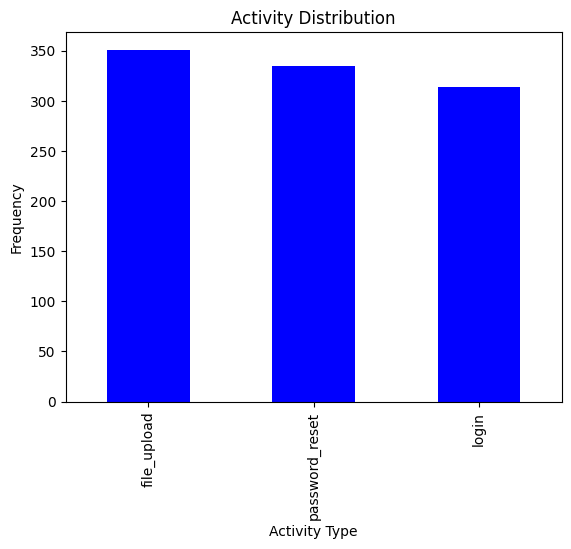

In [23]:
logs['activity'].value_counts().plot(kind='bar', color='blue')
plt.title("Activity Distribution")
plt.xlabel("Activity Type")
plt.ylabel("Frequency")
plt.show()


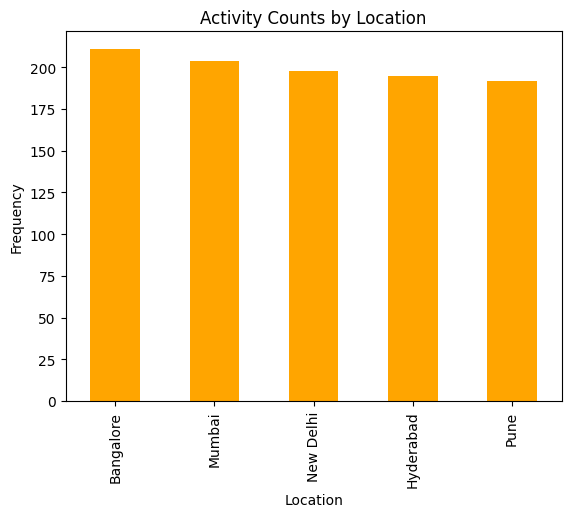

In [28]:
logs['location'].value_counts().plot(kind='bar', color='orange')
plt.title("Activity Counts by Location")
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.show()


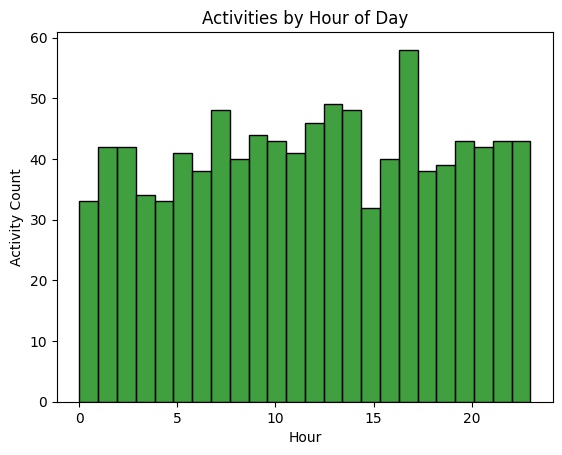

In [26]:
logs['timestamp'] = pd.to_datetime(logs['timestamp'])
logs['hour'] = logs['timestamp'].dt.hour

sns.histplot(logs['hour'], bins=24, kde=False, color='green')
plt.title("Activities by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Activity Count")
plt.show()


In [27]:
logs['timestamp'] = pd.to_datetime(logs['timestamp'], errors='coerce')  # Convert to datetime
logs = logs.dropna(subset=['timestamp'])  # Drop invalid rows

# Extract the hour
logs['hour'] = logs['timestamp'].dt.hour

# Display results
print(logs[['timestamp', 'hour']].head())

                   timestamp  hour
0 2024-11-30 00:19:24.728819     0
1 2024-12-01 08:19:24.728819     8
2 2024-11-22 07:19:24.728819     7
3 2024-11-16 05:19:24.728819     5
4 2024-12-01 05:19:24.728819     5


In [29]:
print(logs[logs['status'] == 'failed'].shape[0])


486


In [30]:
unusual_locations = logs['location'].value_counts().tail(5)
print(unusual_locations)


location
Bangalore    211
Mumbai       204
New Delhi    198
Hyderabad    195
Pune         192
Name: count, dtype: int64


In [31]:
night_logs = logs[(logs['hour'] >= 0) & (logs['hour'] <= 6)]
print(night_logs.head())


                    timestamp  user_id     activity   location   status  hour
0  2024-11-30 00:19:24.728819  user_65  file_upload  Bangalore  success     0
3  2024-11-16 05:19:24.728819  user_78  file_upload     Mumbai  success     5
4  2024-12-01 05:19:24.728819  user_45        login     Mumbai  success     5
9  2024-12-08 02:19:24.728819  user_41  file_upload     Mumbai   failed     2
19 2024-12-04 05:19:24.728819  user_55        login     Mumbai  success     5


Daily activity count

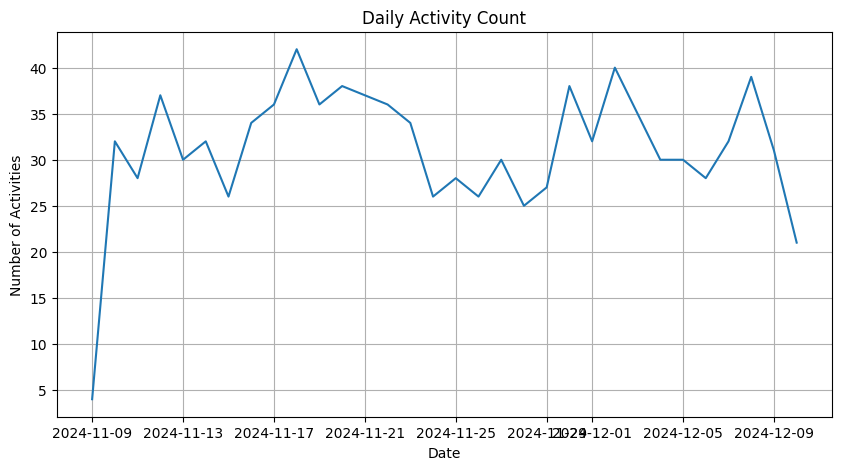

In [32]:
import matplotlib.pyplot as plt

# Extract the date from the timestamp
logs['timestamp'] = pd.to_datetime(logs['timestamp'])
logs['date'] = logs['timestamp'].dt.date

# Group by date and count activities
daily_activity = logs.groupby('date').size()

# Plot the daily activity count
plt.figure(figsize=(10, 5))
daily_activity.plot(kind='line', title='Daily Activity Count')
plt.xlabel('Date')
plt.ylabel('Number of Activities')
plt.grid()
plt.show()


Activity breakdown
counting the each activity 

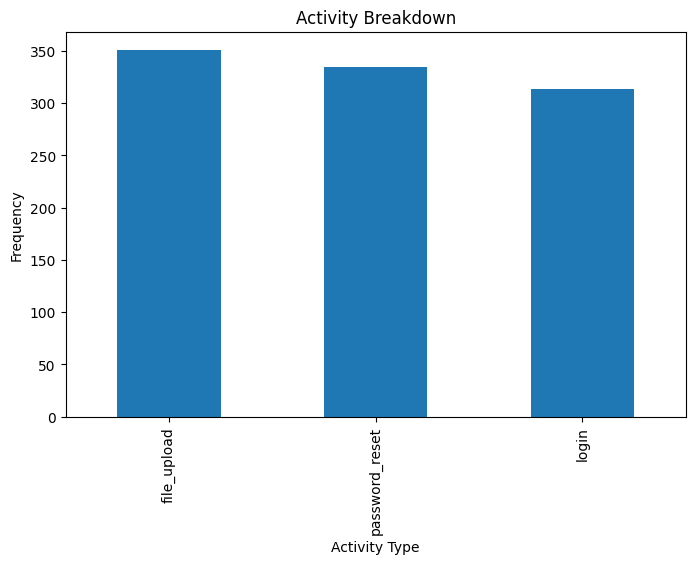

In [33]:
# Count the frequency of each activity type
activity_counts = logs['activity'].value_counts()

# Plot activity counts as a bar chart
activity_counts.plot(kind='bar', title='Activity Breakdown', figsize=(8, 5))
plt.xlabel('Activity Type')
plt.ylabel('Frequency')
plt.show()


FEATURE ENGINEERING
1. ACTIVITY HOUR (0)
2. ACTIVITY FREQUENCY
3. TIME BETWEEN TWO CONSECUTIVE ACTIVITY
4. UNIQUE SEQUENCE OF ACTIVITY SESSION

In [ ]:
# Extract hour from the timestamp
logs['hour'] = logs['timestamp'].dt.hour
print(logs[['timestamp', 'hour']].head())
# Count activities per user
activity_frequency = logs.groupby(['user_id', 'activity']).size().unstack(fill_value=0)
print(activity_frequency)
# Calculate the time difference between consecutive activities
logs['time_diff'] = logs.groupby('user_id')['timestamp'].diff().dt.total_seconds()
print(logs[['user_id', 'timestamp', 'time_diff']].head())
# Group activities by user and create sequences
logs['activity_sequence'] = logs.groupby('user_id')['activity'].transform(lambda x: ' -> '.join(x))
print(logs[['user_id', 'activity_sequence']].head())


SAVING THE PROCESSED DATA

In [35]:
# Save the processed dataset
processed_file_path = r"C:\Users\Yawar\Detecting_Data_Breaches\data\processed_logs.csv"
logs.to_csv(processed_file_path, index=False)
print(f"Processed dataset saved to {processed_file_path}")


Processed dataset saved to C:\Users\Yawar\Detecting_Data_Breaches\data\processed_logs.csv
